In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plotPCA(data, labels, pointSize):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = labels
    for target in targets:
        indicesToKeep = data['labels'] == target
        ax.scatter(data.loc[indicesToKeep, 'principal component 1']
                   , data.loc[indicesToKeep, 'principal component 2']
                   , c = "#"+''.join([random.choice(list('ABCDEF0123456789')) for i in range(6)])
                   , s = pointSize)

## MNIST DataSet

In [3]:
from mnist import MNIST
mndata = MNIST('samples')
trainImage, trainLables = mndata.load_training()
testImage, testLables = mndata.load_testing()

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
trainImage = scaler.fit_transform(trainImage)
pca = PCA(n_components=2)
principleComponents = pca.fit_transform(trainImage)

In [5]:
import pandas as pd
principalDf = pd.DataFrame(data = principleComponents
             , columns = ['principal component 1', 'principal component 2'])

In [6]:
principalDf.insert(loc=len(principalDf.columns), column="labels", value=np.array(trainLables))

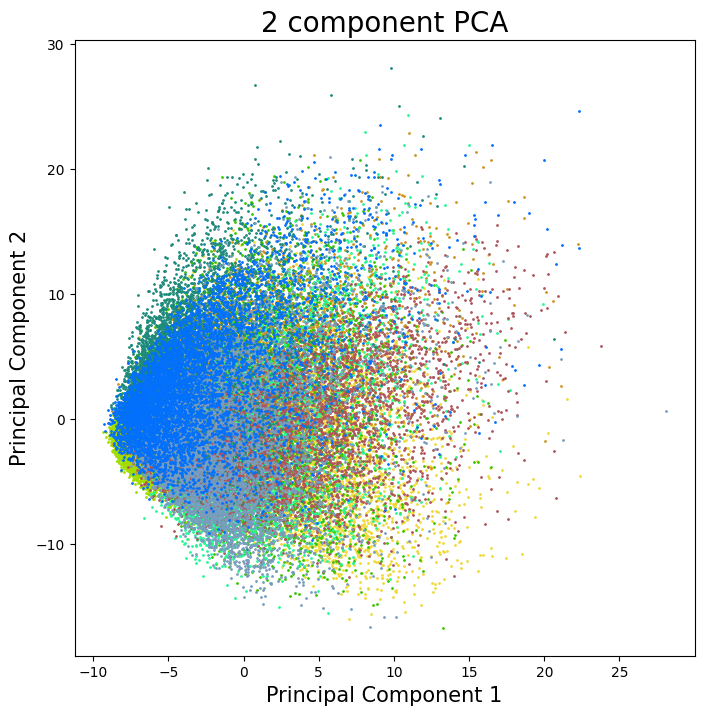

In [7]:
plotPCA(principalDf, np.linspace(1,10,10), 1)

## Oliveretti faces dataset

In [8]:
from sklearn import datasets
datasetOlivetti = datasets.fetch_olivetti_faces()

In [9]:
scaler = StandardScaler()
trainImage = scaler.fit_transform(datasetOlivetti["data"])
pca = PCA(n_components=2)
principleComponents = pca.fit_transform(trainImage)

In [10]:
import pandas as pd
principalDf = pd.DataFrame(data = principleComponents
             , columns = ['principal component 1', 'principal component 2'])

In [11]:
principalDf.insert(loc=len(principalDf.columns), column="labels", value=np.array(datasetOlivetti["target"]))

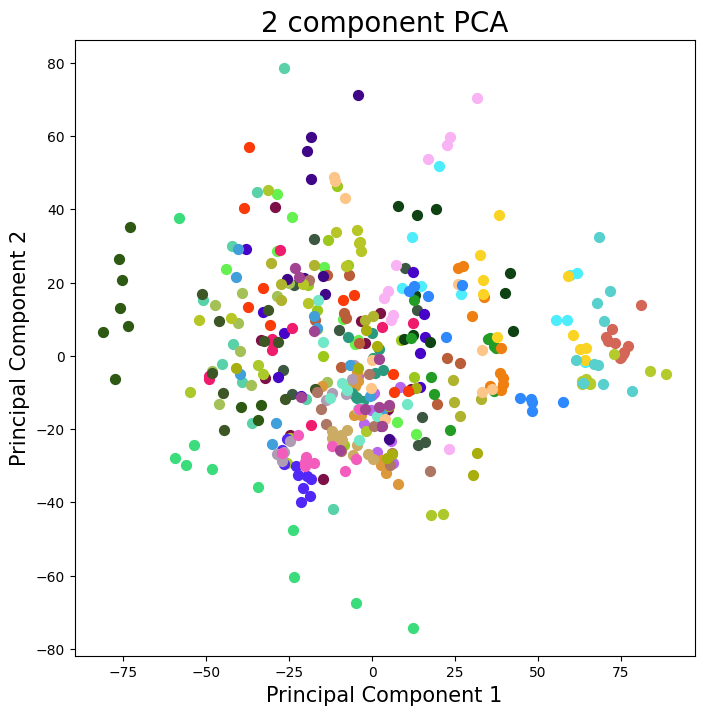

In [12]:
plotPCA(principalDf, set(datasetOlivetti["target"]), 50)

## COIL-20 faces dataset

In [13]:
from os import listdir
from matplotlib import image
loaded_images = list()
for filename in listdir('coil-20-proc'):
    img_data = image.imread('coil-20-proc/' + filename)
    loaded_images.append(img_data)

In [14]:
oned_loaded_images = np.reshape(loaded_images, (1440, 16384))

In [15]:
scaler = StandardScaler()
trainImage = scaler.fit_transform(oned_loaded_images)
pca = PCA(n_components=2)
principleComponents = pca.fit_transform(trainImage)

In [16]:
labelsList = [i for i in range(1,21) for j in range(72)]

In [17]:
principalDf = pd.DataFrame(data = principleComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.insert(loc=len(principalDf.columns), column="labels", value=np.array(labelsList))

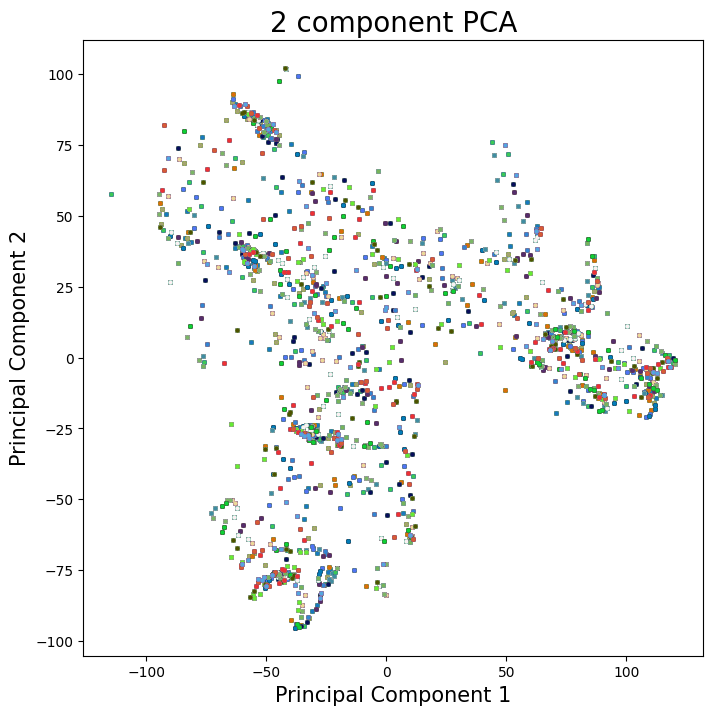

In [18]:
plotPCA(principalDf, labelsList, 5)